쥬피터 터미널에서 설치

1. pip install pystan 

- PyStan is a Python interface to Stan, a package for Bayesian inference.

   Stan® is a state-of-the-art platform for statistical modeling and high-      performance statistical computation. Thousands of users rely on Stan for      statistical modeling, data analysis, and prediction in the social,            biological, and physical sciences, engineering, and business.

   Stan®은 통계 모델링 및 고성능 통계 계산을 위한 최첨단 플랫폼입니다. 수천    명의 사용자가 통계 모델링, 데이터 분석 및 사회, 생물학 및 물리 과학, 엔지    니어링 및 비즈니스 분야의 예측을 위해 Stan에 의존하고 있습니다.


2. pip install fbprophet

- Prophet
   페이스북이 만든 시계열 예측 라이브러리
   
   통계적 지식이 없어도 직관적 파라미터를 통해 모형을 조정할 수 있음
   
   일반적인 경우 기본값만 사용해도 높은 성능을 보여줌
   
- conda install -c conda-forge fbprophet(만약 위의 방법으로 설치가 안될경우 이방법으로 시도해보면 잘됨)    

# 데이터만 필터링 및 월단위 데이터로 변환

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel('Superstore.xls',index_col=0)

In [6]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
data = data[data['Category'] == 'Furniture']

In [11]:
data = data[['Order Date','Sales']]

In [12]:
data.sort_values('Order Date') #sort_values는 오래된 날짜 부터 오름차순으로 날짜 정렬해줌

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
...,...,...
7637,2017-12-29,258.750
7633,2017-12-29,1207.840
5132,2017-12-29,101.120


In [14]:
data = data.groupby('Order Date').sum()

In [15]:
data

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [17]:
data.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

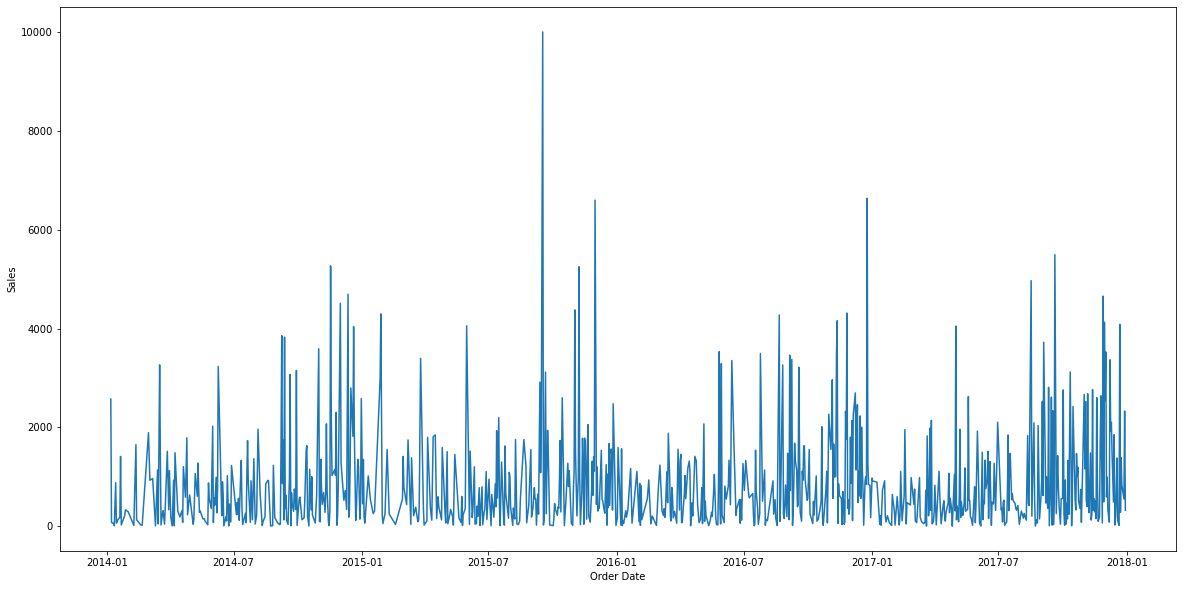

In [19]:
# 방법1
plt.figure(figsize=(20,10))
sns.lineplot(x= data.index, y = data['Sales'])

<AxesSubplot:xlabel='Order Date'>

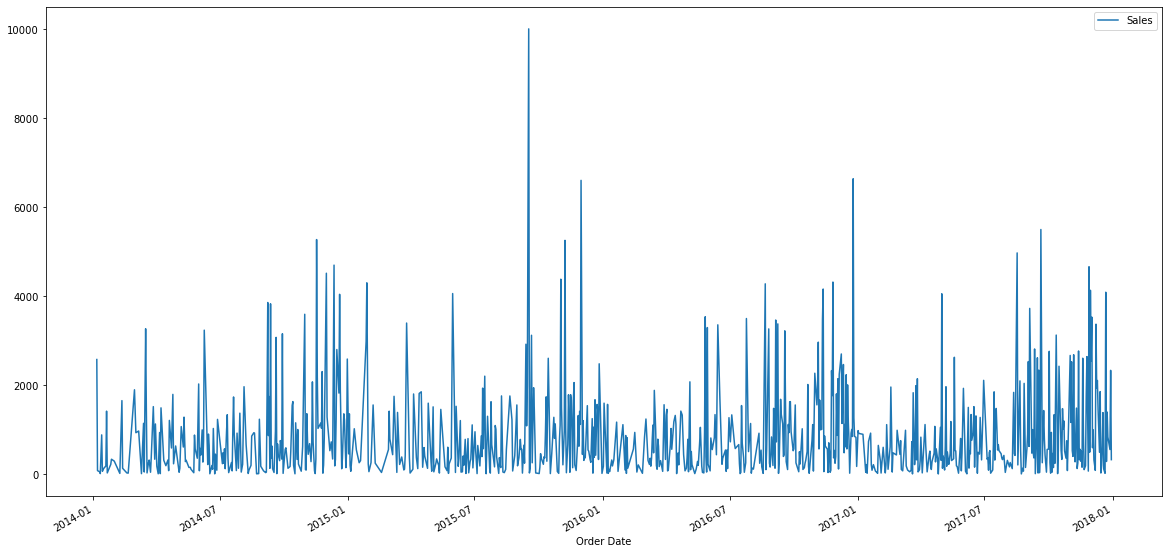

In [21]:
#방법2
data.plot(figsize=(20,10))

In [23]:
data = data.resample('MS').mean() #월달로 나열(MS)

# Prophet 알고리즘으로 시계열 데이터 예측

- Prophet을 위한 조건
  1. 1년 이상의 데이터(최소1달)
  2. Seasonality
  3. Event/Holiday
  4. Historical Trend Change

In [24]:
from fbprophet import Prophet

In [26]:
df = data.reset_index()

In [27]:
df.columns = ['ds','y']

In [28]:
df

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049187
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [29]:
model = Prophet()

In [30]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = model.make_future_dataframe(periods=12, freq = 'MS') #월단위로 12개월 

In [34]:
pred = model.predict(future)

In [35]:
pred = pred[['ds','yhat','yhat_lower','yhat_upper']] # 날짜값, 예측값, 예측값기준으로 위아래 오류를 보여줌

In [37]:
pred

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,535.372051,375.403336,704.701203
1,2014-02-01,451.116320,291.231440,612.689401
2,2014-03-01,706.401580,552.389068,857.102542
3,2014-04-01,630.086487,483.504901,786.652596
4,2014-05-01,570.801960,413.684778,718.897705
5,2014-06-01,619.221566,465.419618,778.128361
6,2014-07-01,653.108224,502.259401,814.327618
7,2014-08-01,618.725269,454.826439,770.912406
8,2014-09-01,1198.882434,1046.561143,1367.368707
9,2014-10-01,709.886092,541.681039,872.123868


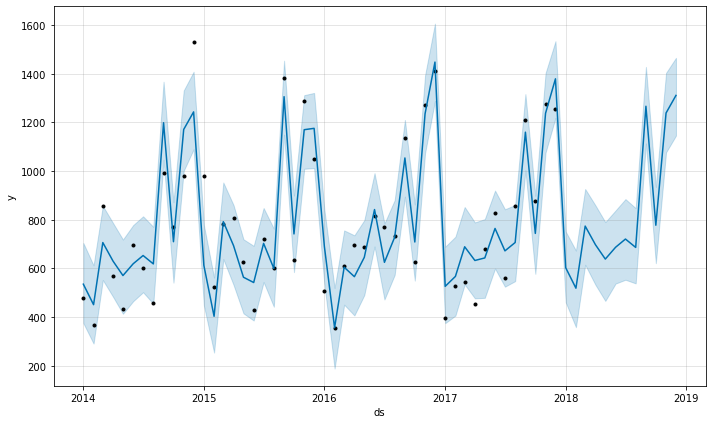

In [39]:
model.plot(pred)
plt.show()

In [41]:
data.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187


In [42]:
data['Sales']

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049187
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [45]:
data['2015':] # 2015년 부터 나열

,Sales
Order Date,
2015-01-01,978.328467
2015-02-01,522.395667
2015-03-01,781.236437
2015-04-01,805.822962
2015-05-01,624.996700
2015-06-01,428.565500
2015-07-01,719.706316
2015-08-01,602.412012
2015-09-01,1382.790684


In [47]:
new_df = data[:'2016']

In [49]:
new_df = new_df.reset_index()

In [50]:
new_df.columns = ['ds','y']

In [51]:
new_df

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049187
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [52]:
model = Prophet()

In [53]:
model.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future = model.make_future_dataframe(periods=12,freq='MS')

In [69]:
pred = model.predict(future)

In [59]:
pred = pred[['ds','yhat']]

In [62]:
pred.set_index('ds', inplace=True)

In [65]:
pred = pred['2017':]

In [66]:
pred

,yhat
ds,
2017-01-01,804.654439
2017-02-01,601.206519
2017-03-01,782.905071
2017-04-01,754.585300
2017-05-01,685.352805
2017-06-01,805.507656
2017-07-01,792.293717
2017-08-01,714.448423
2017-09-01,1208.615983


<AxesSubplot:xlabel='ds'>

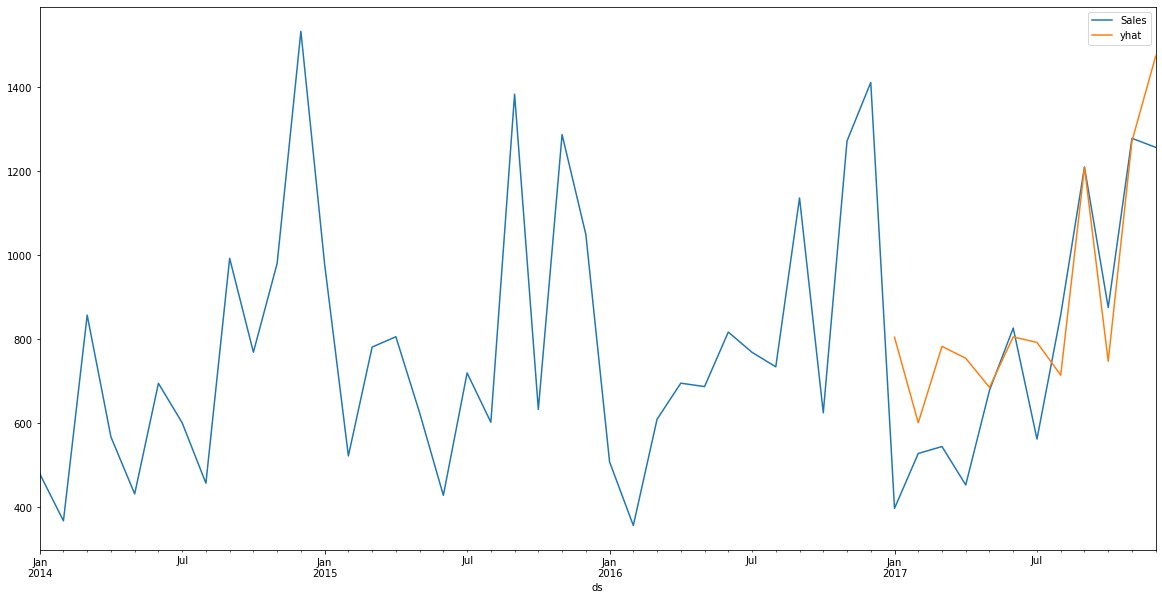

In [67]:
ax = data.plot()
pred.plot(ax=ax, figsize=(20,10))

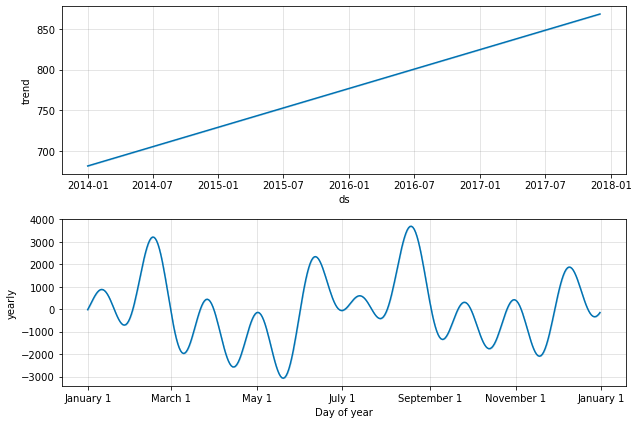

In [71]:
model.plot_components(pred)
plt.show() #중복된 그래프 삭제 